# 2022 2학기 머신러닝 스터디 : 분류

<div style="text-align: right"> 정리 : 최경호 </div>

[colab에서 열기](https://colab.research.google.com/github/attagungho/knou/blob/main/ML/220904_ml_study_classification.ipynb)

# 베이지안 분류기

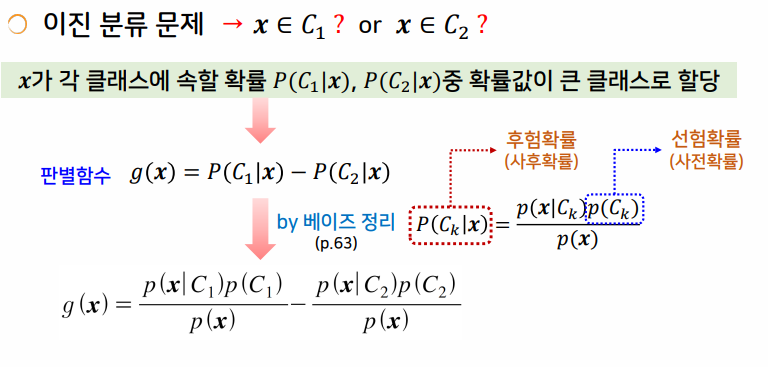

In [1]:
from IPython.display import Image
Image(filename='./data/bt_and_bc.png', width=600)

<p style='text-align: center; font-size: 70%;'>출처 : '머신러닝 2강 강의록', 9p, 한국방송통신대학교<p>

## 베이즈 정리와 베이즈 분류기

### 판별함수 와 베이즈 정리

#### 판별함수


> $$g(x) = P(C_1|x) - P(C_2|x)$$
+ 새로운 데이터 $x$가 주어 졌을 때 $x$가 1 클래스에 속할(관찰될) 확률, 2 클래스에 속할(관찰될) 확률을 계산한다. (베이즈 정리 이용해 계산)
+ 두 확률을 비교하여 속할(관찰될) 확률이 더 큰 클래스로 분류한다.
+ 크기 비교만 할 수 있으면 되므로 각 클래스에 속할(관찰될) 확률을 계산할 때 모든 계산식에 동일하게 곱하거나 더하는 상수항은 무시해도 판별함수 값에 영향 없다.

#### 판별함수와 베이즈 정리


+ 판별함수의 $P(C_1|x), P(C_2|x)$ 는 베이즈 정리 이용해 계산
> $$ P(C_k|x) = \frac{P(x|C_k)P(C_k)}{P(x)} $$
</br>   
   
+ $P(C_k|x)$ : 후험확률 
  + 새로운 데이터 x가 k라는 클래스에 속할 확률;
  + 분류기로 풀고 싶은 문제    
</br>    
    
+ $P(C_k)$ : k클래스의 선험확률 
  + 전체 데이터에서 k클래스가 차지하는 비중; 
  + 알고 있는 확률    
</br>    
    
+ $P(x)$ : 새로운 데이터 x의 선험확률 
  + x 발생 확률; 
  + 알고 있으면 좋겠지만 알고 있기 어려워 확장된 베이즈 정리를 이용함(참고: 교재 64p)    
</br>    
    
+ $P(x|C_k)$ : 조건부확률 
  + k라는 클래스에서 x가 발생할 확률; 
  + 각 클래스의 분포를 가정하여 클래스의 pdf를 계산하고 이 pdf로 계산해서 얻은 우도
  + 클래스 별 유사 pdf를 가정할지, 클래스 별로 다른 pdf를 가정할지, 유사 pdf라면 정규분포 pdf로 계산할지에 따라 달라짐

### pdf 와 우도

#### 확률밀도함수(Probability Density Function)


+ 연속확률변수 X 의 확률 분포 함수
+ 누적분포함수(Cumulative Distribution Fuction)의 도함수(미분)
> $$f(x) = \frac{d}{dx}F(x)$$
+ pdf의 성질
  + $\int_{-\infin}^{\infin}f(x)dx = 1$
  + $f(x) \geq 0$




#### 우도(가능도 : Likelihood)

+ 연속확률변수 x가 발생할 확률은 0
  + 연속된 값의 범위에 속하는 숫자는 무한하다.
  + 연속사건인 경우 특정 값이 나올 확률을 말하는 것은 의미가 없다.
+ 특정 사건이 일어날 확률이 0으로 특정 사건 발생 가능성은 확률로 비교가 불가하다.
+ 이 때 사용하는 개념이 우도(가능도)
+ 직관적으로 pdf 함수의 y 값을 우도로 생각하면 된다.

#### 참고사항 pdf 와 kde

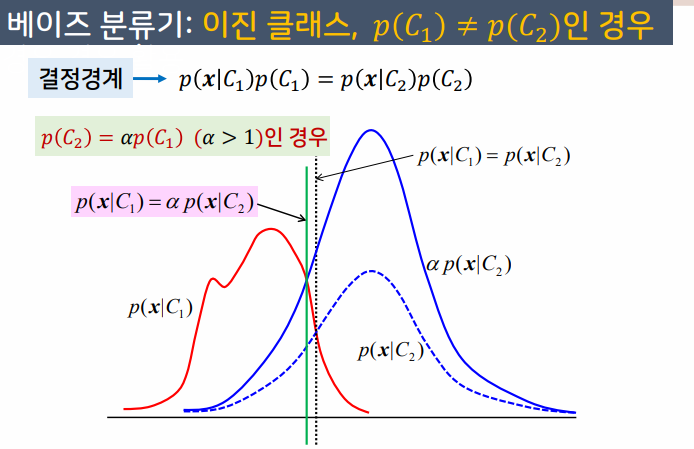

In [2]:
Image(filename='./data/bc_kde_or_pdf.png', width=600)

<p style='text-align: center; font-size: 70%;'>출처 : '머신러닝 2강 강의록', 13p, 한국방송통신대학교<p>

+ pdf의 성질 상 pdf의 모든 구간 적분 값은 1
+ $P(C_2) > P(C_1)$ 으로 2클래스에 속하는 관측값의 비중이 1클래스 관측값의 비중보다 크더라도 pdf 아래 넓이가 변할 수는 없다
+ 위의 그림은 pdf가 아니라 kde 그림 일 수 있다

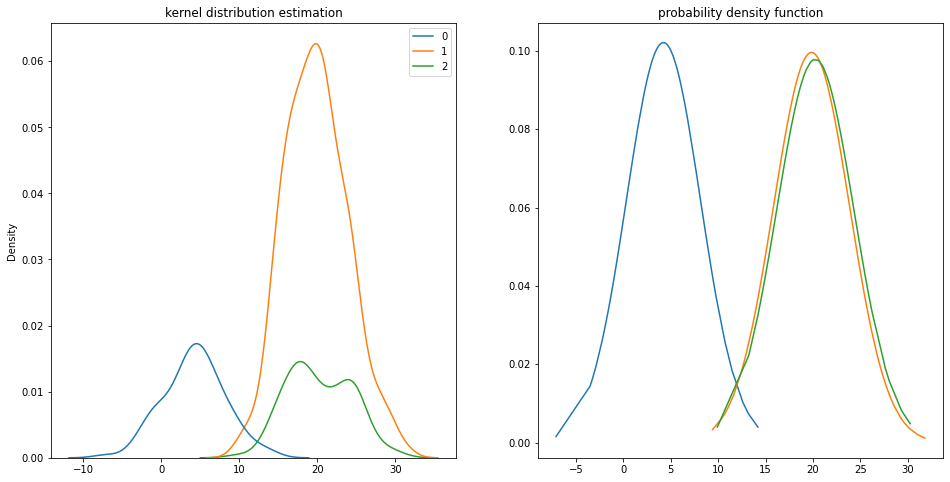

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(904)
group1 = np.random.randn(100) * 4 + 4  #평균 4, 표준편차 4인 정규분포 난수 100개
group2 = np.random.randn(400) * 4 + 20 #평균 20, 표준편차 4인 정규분포 난수 400개
group3 = np.random.randn(100) * 4 + 20 #평균 20, 표준편차 4인 정규분포 난수 100개

# kde 그래프 그리기
fig, ax = plt.subplots(ncols=2, figsize=(16, 8))
sns.kdeplot(data=[group1, group2, group3], ax=ax[0], label=['group1', 'g2', 'g3'])
ax[0].set_title('kernel distribution estimation')

# 그룹별 pdf 계산
loc1, loc2, loc3 = group1.mean(), group2.mean(), group3.mean() # 그룹별 평균 계산
scale1, scale2, scale3 = group1.std(), group2.std(), group3.std() # 그룹별 표준편차 계산
pdf1 = stats.norm.pdf(group1, loc=loc1, scale=scale1) # 1그룹 평균, 표준편차 이용해 정규분포 pdf 추정
pdf2 = stats.norm.pdf(group2, loc=loc2, scale=scale2) # 2그룹 평균, 표준편차 이용해 정규분포 pdf 추정
pdf3 = stats.norm.pdf(group3, loc=loc3, scale=scale3) # 3그룹 평균, 표준편차 이용해 정규분포 pdf 추정
# pdf 그리기
sns.lineplot(x=group1, y=pdf1)
sns.lineplot(x=group2, y=pdf2)
sns.lineplot(x=group3, y=pdf3)
ax[1].set_title('probability density function')

plt.show()

+ 왼쪽 kde 그림은 400개 관측값인 주황색 그래프가 관측값 100 개인 파란색 초록색 보다 커진다.
+ 오른쪽 pdf 그림은 관측 도수에 따라 그래프의 높이가 변하지 않는다.
+ 강의자료에서는 클래스 비중에 따라 결정경계가 변하는 것을 보여주기 어려운 pdf 그림을 사용하지 않은 것으로 보인다.

### 조건부확률과 베이즈 정리


+ 추후 작성

## 공분산과 베이즈 분류기

### 공분산행렬

+ 공분산
> $$cov(X, Y) = E[(X-E[X])(Y-E[Y]]$$
> $$cov(X, X) = E[(X-E[X])(X-E[X]]$$
> $$Var(X) = E[(X-E[X])^2]$$
+ 공분산 행렬 $\Sigma$
>$$ 
>\Sigma = \begin{bmatrix}
>            cov(X,X) & cov(X,Y) \\
>            cov(Y,X) & cov(Y,Y)
>         \end{bmatrix}
>$$
+ 공분산 행렬의 대각 원소는 분산이며 $a_{ij} = a_{ji}$인 대칭 행렬
+ 상관계수 $\rho$
> $$\rho = \frac{cov(X,Y)}{\sqrt{Var(X) \times Var(Y)} }$$
+ 분산이 1인 경우 공분산은 상관계수와 같음

### 공분산 행렬과 판별함수 형태

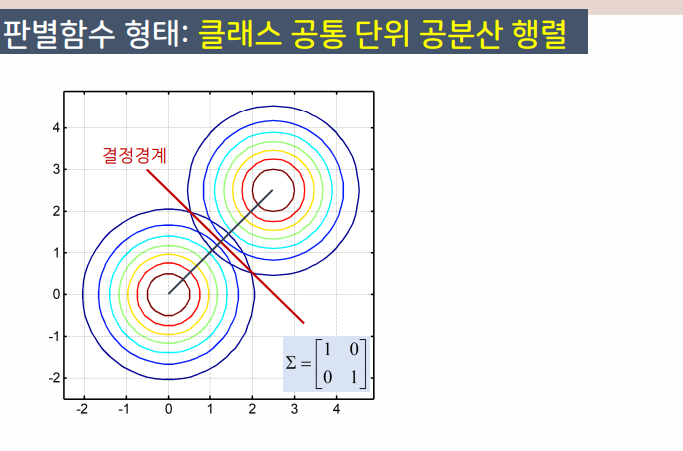

In [4]:
Image('./data/bc_cov1.png', width=600)

+ 클래스들의 공분산행렬은 모두 같음
+ 클래스들의 공분산 행렬이 단위행렬임
+ x, y의 분산이 모두 1이며 x, y의 공분산은 0임
+ 모든 클래스의 x 와 y 가 독립이며, 정규분포를 따르고, 분산은 1인 경우 클래스들이 공통의 단위행렬인 공분산 행렬을 가지게 됨 
  + 주의점 
  >$ 공분산이 0, 상관계수가 0 \neq 확률변수가 독립$

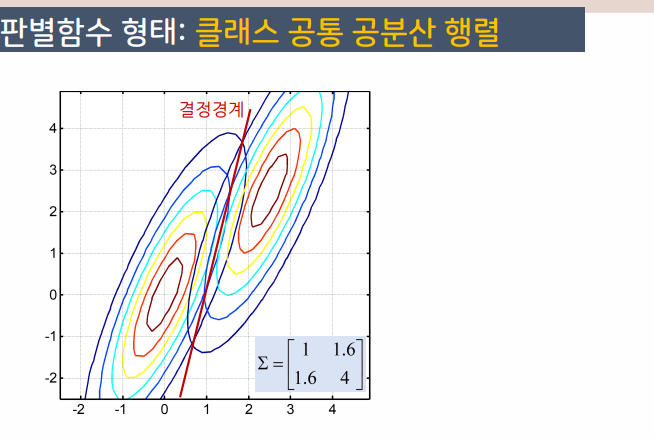

In [5]:
Image('./data/bc_cov2.png', width=600)

+ 클래스들의 공분산행렬은 모두 같음
+ x의 분산은 1, y의 분산은 4
+ x와 y는 독립이 아님 (공분산 행렬이 대각행렬이 아님)
  + 아래 그림에서 언급된 요소별 표준편차 값으로 나눈 후 유클리디안 거리 계산 방식 적용이 안될 것

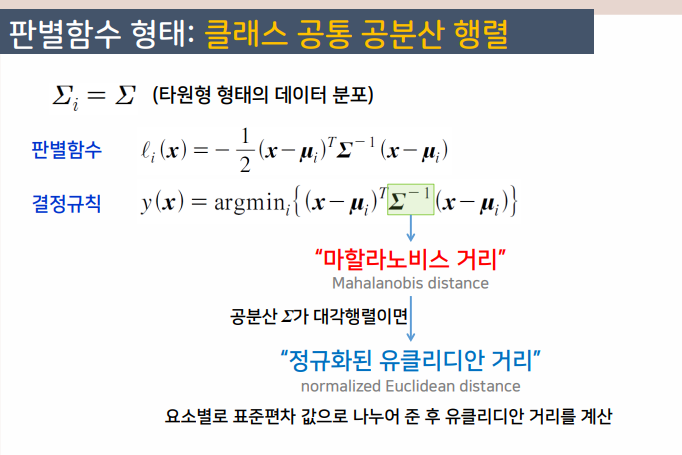

In [6]:
Image('./data/bc_cov2_2.png', width=600)

#### 참고 : 공분산행렬과 분포 형태 확인해보기

##### 클래스 공통 단위 공분산

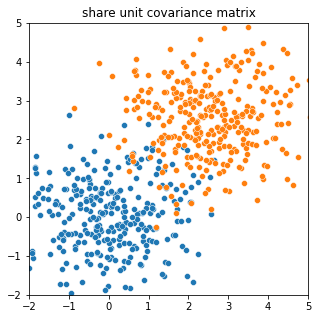

group1 covariance matrix
[[1.18325556 0.044131  ]
 [0.044131   0.91859064]]
group2 covariance matrix
[[1.18325556 0.044131  ]
 [0.044131   0.91859064]]


In [7]:
group1_x = np.random.randn(300) # 그룹1 x변수 표준정규분포 난수 300개
group1_y = np.random.randn(300) # 그룹1 y변수 표준정규분포 난수 300개
group2_x = group1_x + 2.5  # 동일 공분산 행렬 만들기 위해 그룹1 동일 x변수 평균만 수정 
group2_y = group1_y + 2.5  # 동일 공분산 행렬 만들기 위해 그룹1 동일 y변수 평균만 수정

plt.figure(figsize=(5, 5))
sns.scatterplot(x=group1_x, y=group1_y)
sns.scatterplot(x=group2_x, y=group2_y)
plt.xlim(-2, 5)
plt.ylim(-2, 5)
plt.title('share unit covariance matrix')
plt.show()

print('group1 covariance matrix')
print(np.cov(group1_x, group1_y, ddof=0))
print('group2 covariance matrix')
print(np.cov(group2_x, group2_y, ddof=0))

+ 공분산 행렬의 대각원소와 분산이 같은지 확인해 보기

In [8]:
print(group1_x.var(ddof=0), group1_y.var(ddof=0))

1.1832555565003962 0.9185906399321646


##### 클래스 공통 공분산 행렬(대각행렬 아닌 경우)

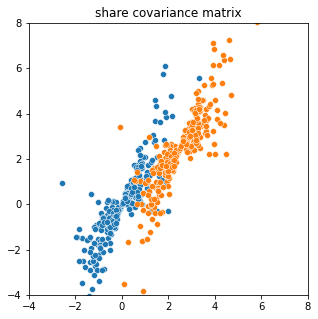

group1 covariance matrix
[[0.89025435 1.39216942]
 [1.39216942 3.00638346]]
group2 covariance matrix
[[0.89025435 1.39216942]
 [1.39216942 3.00638346]]


In [11]:
group1_x = np.random.randn(300) # 그룹1 x변수 표준정규분포 난수 300개
xy_relation = np.random.randn(300) + 1.6
group1_y = group1_x * xy_relation
group2_x = group1_x + 2.5
group2_y = group1_y + 2.5

plt.figure(figsize=(5, 5))
sns.scatterplot(x=group1_x, y=group1_y)
sns.scatterplot(x=group2_x, y=group2_y)
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.title('share covariance matrix')
plt.show()

print('group1 covariance matrix')
print(np.cov(group1_x, group1_y, ddof=0))
print('group2 covariance matrix')
print(np.cov(group2_x, group2_y, ddof=0))

##### 클래스 공통 공분산(대각행렬인 경우)

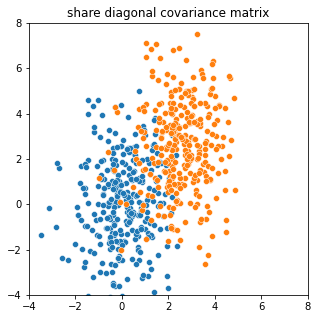

group1 covariance matrix
[[1.11370559 0.11938188]
 [0.11938188 3.84975321]]
group2 covariance matrix
[[1.11370559 0.11938188]
 [0.11938188 3.84975321]]


In [10]:
group1_x = np.random.randn(300)
group1_y = np.random.randn(300) * 2
group2_x = group1_x + 2.5
group2_y = group1_y + 2.5

plt.figure(figsize=(5, 5))
sns.scatterplot(x=group1_x, y=group1_y)
sns.scatterplot(x=group2_x, y=group2_y)
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.title('share diagonal covariance matrix')
plt.show()

print('group1 covariance matrix')
print(np.cov(group1_x, group1_y, ddof=0))
print('group2 covariance matrix')
print(np.cov(group2_x, group2_y, ddof=0))